# Test week 1

### Description variables:
Simulated data set on weekly sales and advertising of a department store.

\*** Advertising: index of advertising efforts in current and previous week

\*** Sales: sales volume in current week 

### Questions
This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates
assumptions A3 and A4, which state that all error terms εi are drawn from one and the same distribution with
mean zero and fixed variance $σ^2$

. The dataset contains twenty weekly observations on sales and advertising of a
department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks
was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis.

(a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you
expect to find if you would fit a regression line to these data?

(b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising
as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?

(c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this
histogram?

(d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual
corresponds to the week with opening hours during the evening, how would you proceed to get a more
satisfactory regression model?

(e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and
b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and t-value of b. Is b significantly different from 0?

(f) Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned
from these results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.pyplot as plt
import os
path = os.getcwd()
train_exercise=os.path.join(path, 'prueba')
#os.listdir()

In [142]:
Dataset1_path=os.path.join(path, 'TestExer-1-sales-round1.xls' )
#TrainExer11_path=os.path.join(path, os.listdir()[3] )
#print(Dataset1_path)#,'\n',TrainExer11_path)

In [62]:
Dataset1 = pd.read_excel(Dataset1_path)
Dataset1

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23
5,6,9,25
6,7,15,27
7,8,6,25
8,9,11,26
9,10,16,27


### (a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?
Normally we expect a increasing slope of b, but there is a Value of 50, who create the inverse sign for b.

Text(0, 0.5, 'Sales')

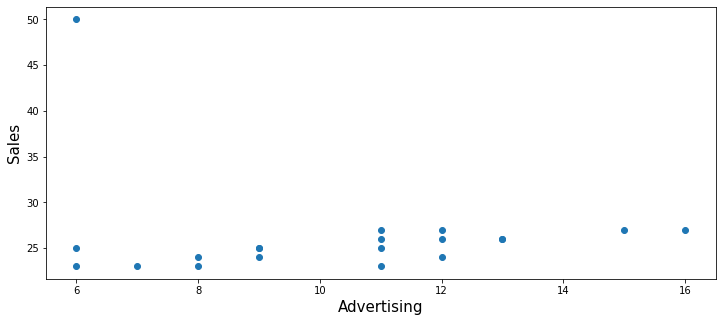

In [6]:
# Scatter plot}
fig = plt.figure(figsize=(12,5)) # set fig with its size 10 x 10 inch
plt.scatter(Dataset1["Advertising"],Dataset1['Sales'])
plt.xlabel('Advertising', fontsize=15)
plt.ylabel('Sales', fontsize=15)

### (b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?
I put the code and results below, the slope of b is almost Zero, but decreasing with linear regretion.

In [139]:
b=0
bden=0
bnum=0
bhist=[]
x=Dataset1["Advertising"]
y=Dataset1["Sales"]
for i in range(len(Dataset1)):
    bden+=(x[i]*(y[i]-y.mean()))
    bnum+=(x[i]*(x[i]-x.mean()))
b=bden/bnum

a=(y.mean()-b*x.mean())

def esc(code):
    return f'\033[{code}m'
print(esc('31;1;4') + "The value of \"a\" is ", a,"\n","\n","The value of \"b\" is ", b)
e_hist=[]
e=0
for i in range(len(Dataset1)):
    e_hist.append(y[i]-a-b*x[i])
    e+=e_hist[i]
print(esc('31;1;4') + "The value of global residual \"e\" is ", e)

The value of "a" is  29.626893353941277 
 
 The value of "b" is  -0.3245749613601246
The value of global residual "e" is  4.440892098500626e-16


### (c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?
The model does not fit with the data, the interval of error are wider than the values itself.

(array([7., 4., 6., 2., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-4.67944359, -2.42944359, -0.17944359,  2.07055641,  4.32055641,
         6.57055641,  8.82055641, 11.07055641, 13.32055641, 15.57055641,
        17.82055641, 20.07055641, 22.32055641]),
 <a list of 12 Patch objects>)

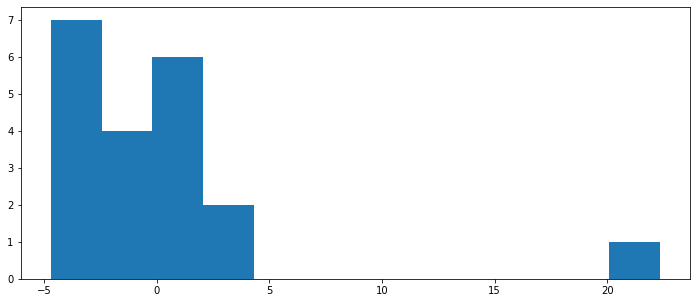

In [140]:
plt.figure(figsize=(12,5))
plt.hist(e_hist,12)

### (d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?



#### R:  I will threat that data as a outlayer, an take of from the acounting for a,b.

### (e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?.
The value of b will not be veri diferent form zero, but it will increase alongside the absise axis.

In [94]:
Dataset2=Dataset1[Dataset1.index!=11] ## A new data set removing the row we don´t need
Dataset2=Dataset2.reset_index(drop=True)

In [95]:
Dataset2['Sales'][11]

26

In [99]:
b2=0
bden2=0
bnum2=0
bhist2=[]
x2=Dataset2["Advertising"]
y2=Dataset2["Sales"]
for i in range(len(Dataset2)):
    bden2+=(x2[i]*(y2[i]-y2.mean()))
    bnum2+=(x2[i]*(x2[i]-x2.mean()))
b2=bden2/bnum2

a2=(y2.mean()-b2*x2.mean())
e_hist2=[]
e2=0
for i in range(len(Dataset2)):
    e_hist2.append(y2[i]-a2-b2*x2[i])
    e2+=e_hist2[i]
print(esc('31;1;4') + "The value of \"a\" is ", a2,"\n","\n","The value of \"b\" is ", b2)
print(esc('31;1;4') + "The value of residual \"e\" is ", e2)

The value of "a" is  21.12500000000003 
 
 The value of "b" is  0.37499999999999756
The value of residual "e" is  -5.417888360170764e-14


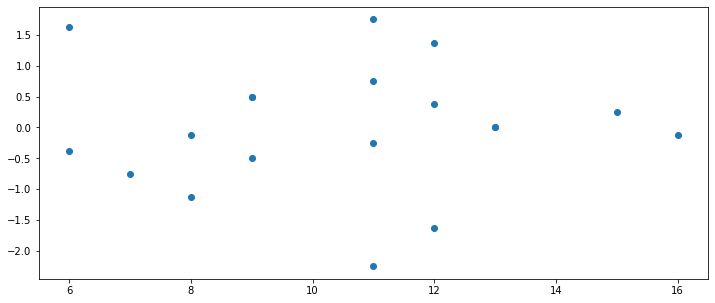

In [100]:
plt.figure(figsize=(12,5))
plt.scatter(x2,e_hist2)

### (f) Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned from these results

The point that has a great difference in the values, impact in the calculation of the slope "b" and "a" offset values, so it change the high of the a, changing the slope. And the residual are distribuited betwen all the vales, creating a great divergence, a great amount of values of each residual.
When we only compare the values that are represented by the linear regretion, we solve the problems before and minimize the values of each residual.
We can see the folowing figures that the higher value of 50, creates a bad model, creating decreasing slopes.

Text(0.5, 1.0, 'Linear Model with outlayer value of 50')

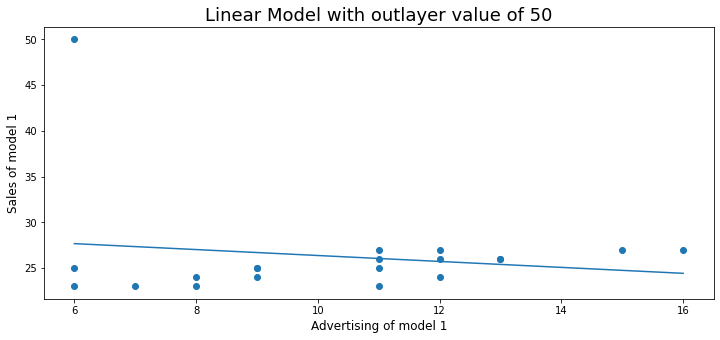

In [126]:
x1_model=list(np.arange(6,17,1))
y1_model=[]
for element in x1_model:
    y1_model.append(a+b*element)
fig = plt.figure(figsize=(12,5)) # set fig with its size 10 x 10 inch
plt.plot(x1_model,y1_model)
plt.scatter(Dataset1["Advertising"],Dataset1['Sales'])
plt.xlabel('Advertising of model 1', fontsize=12)
plt.ylabel('Sales of model 1', fontsize=12)
plt.title('Linear Model with outlayer value of 50', fontsize=18)

Text(0.5, 1.0, 'Linear model without outlayer')

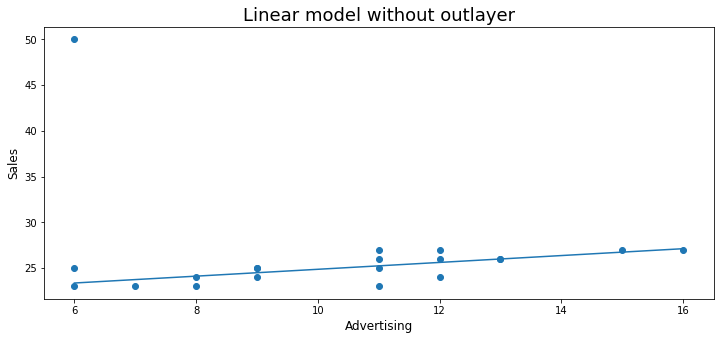

In [125]:
x2_model=list(np.arange(6,17,1))
y2_model=[]
for element in x2_model:
    y2_model.append(a2+b2*element)
fig = plt.figure(figsize=(12,5)) # set fig with its size 10 x 10 inch
plt.plot(x2_model,y2_model)
plt.scatter(Dataset1["Advertising"],Dataset1['Sales'])
plt.xlabel('Advertising', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Linear model without outlayer', fontsize=18)

In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics 

\begin{align*}
T=\dfrac{(\overline{X_1}-\overline{X_2})-D_0} {S_{\overline{X_1}-\overline{X_2}}}
\\[1em]
=\dfrac{(\overline{X_1}-\overline{X_2})-D_0} {\sqrt{\dfrac{S_1^2}{n_1}+\dfrac{S_2^2}{n_2} }}
\\
\\
\textit{Dado que: }\quad n=6=n_1=n_2 \implies\quad
\dfrac{(\overline{X_1}-\overline{X_2})-D_0} {\sqrt{\dfrac{S_1^2+S_2^2}{n} }}
\\[1em]
= \dfrac{(6.666-10.166)} {\sqrt{\dfrac{3.888^2+6.472^2}{6} }}\simeq -1.13551679928
\end{align*}


In [34]:
(6.666-10.1666)/((s2_var+s1_var)/5)

-1.4077479892761395

In [1]:
Primaria= [7,4,10,6,5,8]
Secundaria= [13, 14, 9, 8, 7, 10]

In [12]:
np.std(Primaria)**2

3.888888888888889

In [13]:
np.std(Secundaria)**2

6.472222222222223

In [25]:
var_p=[]
for i in Primaria:
    var_p.append((i-np.mean(Primaria))**2)
s1_var=(sum(var_p)/5)
s1_var

4.666666666666667

In [30]:
var_s=[]
for i in Secundaria:
    var_s.append((i-np.mean(Secundaria))**2)
s2_var=(sum(var_s)/5)
s2_var

7.7666666666666675